## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy import stats

In [2]:
data_folder = './data/'

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

In [3]:
# Read the data frame
df_full = pd.read_csv(data_folder +'acs2015_county_data.csv');

# Drop all other features other than needed ones
col_list = ['SelfEmployed', 'IncomePerCap', 'State']
df_min  = df_full[col_list]
df_min.shape

(3220, 3)

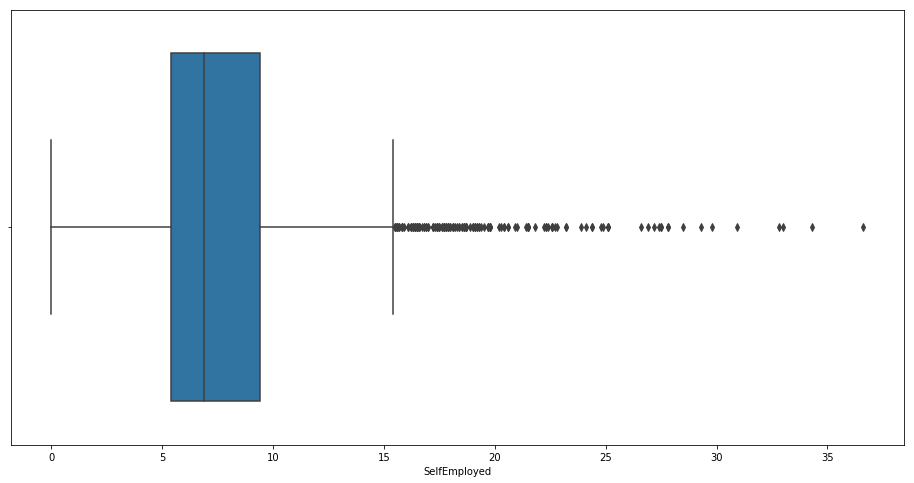

In [5]:
# Clean up dataframe from outliers

# Boxplot to visualize possible outliers presence for column SelfEmployed
_ = plt.figure(figsize=(16,8))
sns.boxplot(x=df_min['SelfEmployed'])

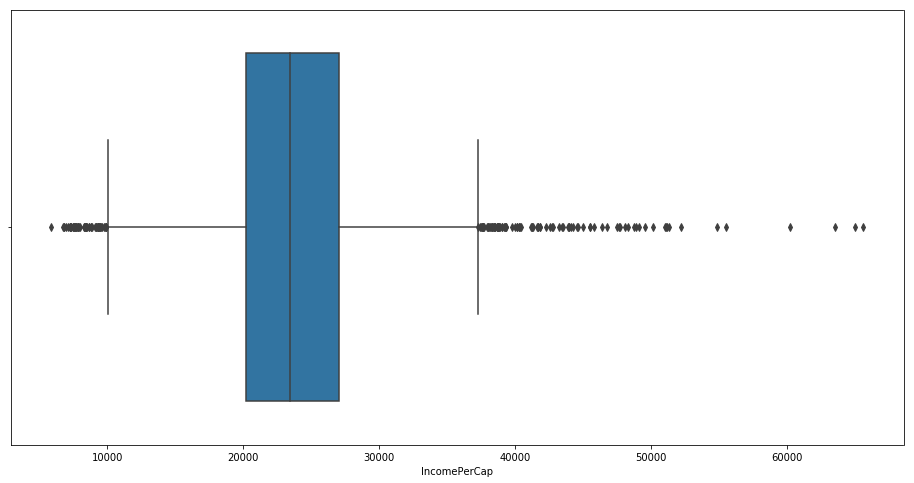

In [174]:
# Boxplot to visualize possible outliers presence for column SelfEmployed

_ = plt.figure(figsize=(16,8))
sns.boxplot(x=df_min['IncomePerCap'])

<Figure size 1152x576 with 0 Axes>

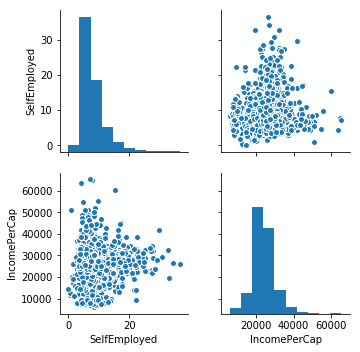

In [7]:
# Plot pairplot to visualize possible outliers
# Note: if the plot doesn't display, delete the height attribute

_ = plt.figure(figsize=(16,8))
sns.pairplot(data=df_min, vars=['SelfEmployed', 'IncomePerCap'], height=5)

In [8]:
# Remvoe outliers by using Z-Score applied only on SelfEmployed and IncomePerCap
numeric_cols = df_min.select_dtypes(include=[np.number]).columns
z = df_min[numeric_cols].apply(stats.zscore)

df = df_min[(z < 3).all(axis=1)]
df.shape

(3123, 3)

## 1.A

In [10]:
# compute two correlation methods on the whole set

spearman_corr = df['SelfEmployed'].corr(df['IncomePerCap'], method='spearman')
pearson_corr, _ = pearsonr(df['SelfEmployed'], df['IncomePerCap'])
print('Spearman: ', spearman_corr)
print('Pearson: ', pearson_corr)

Spearman:  0.041271924375410295
Pearson:  0.07087157679637004


**Do citizens in counties that have a higher percentage of self-employed people earn more per capita?**

By looking at the correlation methods used (Spearman and Pearson), we can see that both show a very low correlation between the self-employment percentage in a county and the income per capita. Counties with higher percentage of self-employed people do not necessarily generate higher income per capita.

## 1.B


In [150]:
a = ['Wisconsin', 'Tennessee', 'Minnesota']

# Compute three states all together
set_a = df[df['State'].isin(a)]
spearman_corr = round(set_a['SelfEmployed'].corr(set_a['IncomePerCap'], method='spearman'), 2)
pearson_corr, _ = pearsonr(set_a['SelfEmployed'], set_a['IncomePerCap'])
print('Set A Spearman:',spearman_corr)
print('Set A Pearson:', round(pearson_corr, 2))

# Compute each state individually
wisconsin_df = df[df['State'] == 'Wisconsin']
tennessee_df = df[df['State'] == 'Tennessee']
minnesote_df = df[df['State'] == 'Minnesota']

# Wisconsin
spearman_corr = round(wisconsin_df['SelfEmployed'].corr(wisconsin_df['IncomePerCap'], method='spearman'), 2)
pearson_corr, _ = pearsonr(wisconsin_df['SelfEmployed'], wisconsin_df['IncomePerCap'])
print('Wisconsin Spearman:', spearman_corr)
print('Wisconsin Pearson: ', round(pearson_corr, 2))

# Tennessee
spearman_corr = round(tennessee_df['SelfEmployed'].corr(tennessee_df['IncomePerCap'], method='spearman'), 2)
pearson_corr, _ = pearsonr(tennessee_df['SelfEmployed'], tennessee_df['IncomePerCap'])
print('Tennessee Spearman:', spearman_corr)
print('Tennessee Pearson:', round(pearson_corr, 2))

# Minnesota
spearman_corr = round(minnesote_df['SelfEmployed'].corr(minnesote_df['IncomePerCap'], method='spearman'), 2)
pearson_corr, _ = pearsonr(minnesote_df['SelfEmployed'], minnesote_df['IncomePerCap'])
print('Minnesota Spearman:', spearman_corr)
print('Minnesota Pearson:', round(pearson_corr,2))

Set A Spearman: -0.24
Set A Pearson: -0.21
Wisconsin Spearman: -0.46
Wisconsin Pearson:  -0.35
Tennessee Spearman: -0.33
Tennessee Pearson: -0.32
Minnesota Spearman: -0.21
Minnesota Pearson: -0.25


**The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.**

State | Spearman | Pearson
---|---|---
**Wisconsin** | -0.46 | -0.35
**Tennessee** | -0.33 | -0.32
**Minnesota** | -0.21 | -0.25
**Entire Set A** | **-0.24** | **-0.21**

After computing the correlations using Spearman and Pearson for set A all together, we can see that in both cases the correlation is leaning towards the negative side with about -0.2. This means that in a slight way the more self-employed people there are, the less the income per capita will be.

We can also observe the same negative correlation tendency in the individual states.


## 1.C
**In which state within set A is the observed effect of self-employment on per-capita income the strongest?**

In each state we see a negative correlation between the self-employed percentage and income per capita. As previously exaplained, this means that the more self-employed people there are, the lower the income per capita will be. In Wisconsin we can see a highest negative correlation between the two features, indicating the strongest effect of self-employment on per-capita income. The other two states are slighly lower but still inversely proportional.

## 1.D

In [151]:
b = ['New Jersey', 'Kansas', 'Rhode Island']

# Compute three states all together
set_b = df[df['State'].isin(b)]
spearman_corr = round(set_b['SelfEmployed'].corr(set_b['IncomePerCap'], method='spearman'), 2)
pearson_corr, _ = pearsonr(set_b['SelfEmployed'], set_b['IncomePerCap'])
print('Set B Spearman:', spearman_corr)
print('Set B Pearson:', round(pearson_corr,2))

# Compute each state individually
nj_df = df[df['State'] == 'New Jersey']
ks_df = df[df['State'] == 'Kansas']
ri_df = df[df['State'] == 'Rhode Island']

# New Jersey
spearman_corr = round(nj_df['SelfEmployed'].corr(nj_df['IncomePerCap'], method='spearman'), 2)
pearson_corr, _ = pearsonr(nj_df['SelfEmployed'], nj_df['IncomePerCap'])
print('New Jersey Spearman:', spearman_corr)
print('New Jersey Pearson: ', round(pearson_corr,2))

# Kansas
spearman_corr = round(ks_df['SelfEmployed'].corr(ks_df['IncomePerCap'], method='spearman'), 2)
pearson_corr, _ = pearsonr(ks_df['SelfEmployed'], ks_df['IncomePerCap'])
print('Kansas Spearman:', spearman_corr)
print('Kansas Pearson:', round(pearson_corr,2))

# Rhode Island
spearman_corr = round(ri_df['SelfEmployed'].corr(ri_df['IncomePerCap'], method='spearman'), 2)
pearson_corr, _ = pearsonr(ri_df['SelfEmployed'], ri_df['IncomePerCap'])
print('Rhode Island Spearman:', spearman_corr)
print('Rhode Island Pearson:', round(pearson_corr,2))


Set B Spearman: -0.11
Set B Pearson: -0.17
New Jersey Spearman: 0.15
New Jersey Pearson:  0.34
Kansas Spearman: 0.27
Kansas Pearson: 0.25
Rhode Island Spearman: 1.0
Rhode Island Pearson: 0.9


**Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.**

State | Spearman | Pearson
---|---|---
**New Jersey** | 0.15 | 0.34
**Kansas** | 0.27 | 0.25
**Rhode Island** | 1.0 | 0.9
**Entire Set B** | **-0.11** | **-0.17**

After computing the correlations using Spearman and Pearson for set B all together, we can see that in both cases the correlation is leaning towards the negative side. This means that in a slight way the more self-employed people there are, the less the income per capita will be. This is not too far from set A.

However, when we take each state individually, we can see that there's a slight positive correlation in the state of Kansas, while this correlation is a little more evident in the state of New Jersey when using Pearson correlation. 
Rhode Island, on the other hand, has a super strict positive correlation when it comes to self-employed percentage and income per capita. It's Spearman and Pearson are 0.9 and 1 rounded to 2 decimals. This shows that the more self-employed people in this state, the more the income per capita will be.

If we were to pick a set where to incetivize self-employment, it would clearly be set B. The reason is simply that given the fact that the higher the percentage of self-employed people, the more money will be earned per person in that state, it makes sense to have more people turn to self-employment if they can make more money. This would increase possibly the amount of people that self-employ and therefore the income per capita of the state. 

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

In [3]:
# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Part A

The first step is to load the data and keep the necessary columns

In [4]:
df = pd.read_csv(data_folder + 'aac_intakes_outcomes.csv')
columns_needed = ['animal_type','intake_year','intake_condition','intake_number','intake_type',\
                  'sex_upon_intake','age_upon_intake','time_in_shelter_days','sex_upon_outcome',\
                  'age_upon_outcome_(years)','outcome_type'
                 ]
df = df[columns_needed]

In [5]:
df.head() # get a glimpse of the data

,animal_type,intake_year,intake_condition,intake_number,intake_type,sex_upon_intake,age_upon_intake,time_in_shelter_days,sex_upon_outcome,age_upon_outcome_(years),outcome_type
0,Dog,2017,Normal,1.0,Stray,Neutered Male,10 years,0.588194,Neutered Male,10.0,Return to Owner
1,Dog,2014,Normal,2.0,Public Assist,Neutered Male,7 years,1.259722,Neutered Male,7.0,Return to Owner
2,Dog,2014,Normal,3.0,Public Assist,Neutered Male,6 years,1.113889,Neutered Male,6.0,Return to Owner
3,Dog,2014,Normal,1.0,Owner Surrender,Neutered Male,10 years,4.970139,Neutered Male,10.0,Transfer
4,Dog,2013,Injured,1.0,Public Assist,Neutered Male,16 years,0.119444,Neutered Male,16.0,Return to Owner


As a sanity check , we see if there are any NaN values,if they exist we drop their rows

In [6]:
df.isna().any(axis=0)

animal_type                 False
intake_year                 False
intake_condition            False
intake_number               False
intake_type                 False
sex_upon_intake              True
age_upon_intake             False
time_in_shelter_days        False
sex_upon_outcome             True
age_upon_outcome_(years)    False
outcome_type                 True
dtype: bool

In [7]:
df = df.dropna(axis=0)

The age_upon_intake column has both strings and numbers we inspect this column by showing the unique values

In [8]:
df['age_upon_intake'].unique()

array(['10 years', '7 years', '6 years', '16 years', '15 years',
       '18 years', '14 years', '17 years', '13 years', '19 years',
       '12 years', '20 years', '11 years', '9 years', '5 years',
       '8 years', '3 years', '4 years', '1 year', '11 months', '9 months',
       '2 years', '8 months', '10 months', '7 months', '5 months',
       '6 months', '3 months', '4 months', '2 months', '1 week',
       '3 weeks', '1 weeks', '0 years', '4 weeks', '1 month', '2 weeks',
       '3 days', '4 days', '2 days', '1 day', '5 weeks', '5 days',
       '6 days', '22 years', '25 years'], dtype=object)

To clean this column, we convert the strings into a scale of days.(Example : a week maps to 7 days)

In [9]:
def to_days(age_str):
    age_split = age_str.split(' ')
    age_split[1] = (age_split[1])[:-1] if age_split[1][-1] =='s' else age_split[1] 
    types = ['year','month','week','day']
    if age_split[1] == types[0]: # change years into days
        return int(age_split[0]) * 356
    elif age_split[1] == types[1]: # change months into days
        return int(age_split[0]) * 30
    elif age_split[1] == types[2]: # change weeks into days
        return int(age_split[0]) * 7
    elif age_split[1] == types[3]: # extract days
        return int(age_split[0])
    else:
        raise NotImplementedError('This type of days doesn\'t exist')

In [10]:
df['age_upon_intake'] = df['age_upon_intake'].apply(lambda x : to_days(x))

The next step is to map the output labels into 1 for Adoption and 0 for other cases. This is usefull as the classifiers to be used in latter parts are binary desiscion classifiers

In [11]:
outcome_str   = df['outcome_type'].unique().tolist()
outcome_str   = map(lambda x :(x,1) if x=='Adoption' else (x,0),outcome_str)
outcome_dict  = dict((key, value) for (key, value) in outcome_str)
df['outcome_type'] = df['outcome_type'].apply(lambda x : outcome_dict[x])

The next step is to perform the train and test split

In [12]:
train_split   = int(floor(0.8 * df.shape[0]))
train_data_df = df.loc[0:train_split,:]
test_data_df  = df.loc[train_split:,:]

As a sanity check, we visualize the distribution of the output classes of the test and training sets to see if the dataset is inbalanced.

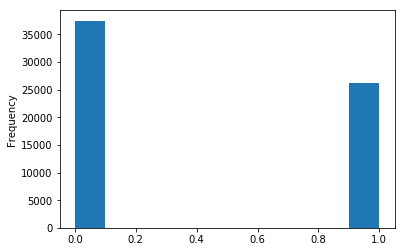

In [13]:
train_data_df['outcome_type'].plot.hist() # outputs of train dataset

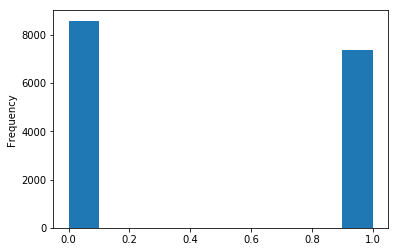

In [14]:
test_data_df['outcome_type'].plot.hist() # viz outputs of test set

From the above plots, the results seem to be reasonable the classes have almost 3 : 4 ratio. They are also well distributed between the two sets.Hence no need for over and under-sampling of classes and shuffling the dataset.

Now we normalize both train and test sets and seperatley by subtracting the mean and dividing by standard deviation

In [15]:
numeric_cols = train_data_df.select_dtypes(include=[np.number]) # extract outputs
numeric_cols = numeric_cols.drop('outcome_type',axis=1)
standardized_cols = (numeric_cols - numeric_cols.mean())/(numeric_cols.std()) # standardize 
train_data_df = train_data_df.drop(standardized_cols.columns.tolist(),axis=1)
train_data_df = train_data_df.join(standardized_cols) # replace the standardized columns from non-standardized values

In [16]:
numeric_cols = test_data_df.select_dtypes(include=[np.number]) # extract outputs
numeric_cols = numeric_cols.drop('outcome_type',axis=1)
standardized_cols = (numeric_cols - numeric_cols.mean())/(numeric_cols.std()) # standardize
test_data_df = test_data_df.drop(standardized_cols.columns.tolist(),axis=1)
test_data_df = test_data_df.join(standardized_cols)# replace the standardized columns from non-standardized values

In [17]:
train_data_df.head()

,animal_type,intake_condition,intake_type,sex_upon_intake,sex_upon_outcome,outcome_type,intake_year,intake_number,age_upon_intake,time_in_shelter_days,age_upon_outcome_(years)
0,Dog,Normal,Stray,Neutered Male,Neutered Male,0,1.869592,-0.288775,2.668459,-0.375083,2.648558
1,Dog,Normal,Public Assist,Neutered Male,Neutered Male,0,-0.936844,1.765596,1.644968,-0.360098,1.628318
2,Dog,Normal,Public Assist,Neutered Male,Neutered Male,0,-0.936844,3.819967,1.303805,-0.363353,1.288239
3,Dog,Normal,Owner Surrender,Neutered Male,Neutered Male,0,-0.936844,-0.288775,2.668459,-0.277300,2.648558
4,Dog,Injured,Public Assist,Neutered Male,Neutered Male,0,-1.872322,-0.288775,4.715441,-0.385544,4.689037


We detect the categorical columns and select them, then convert them into dummy encoding

In [18]:
categorical_columns = ['animal_type','intake_condition','intake_type','sex_upon_intake','sex_upon_outcome']

In [19]:
dummy_var_columns = pd.get_dummies(train_data_df[categorical_columns])
train_data_df = train_data_df.drop(categorical_columns,axis=1)
train_data_df = train_data_df.join(dummy_var_columns)

In [20]:
dummy_var_columns = pd.get_dummies(test_data_df[categorical_columns])
test_data_df = test_data_df.drop(categorical_columns,axis=1)
test_data_df = test_data_df.join(dummy_var_columns)

In [21]:
train_data_df.head()

,outcome_type,intake_year,intake_number,age_upon_intake,time_in_shelter_days,age_upon_outcome_(years),animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,...,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
0,0,1.869592,-0.288775,2.668459,-0.375083,2.648558,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,0,-0.936844,1.765596,1.644968,-0.360098,1.628318,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,0,-0.936844,3.819967,1.303805,-0.363353,1.288239,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,0,-0.936844,-0.288775,2.668459,-0.277300,2.648558,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,-1.872322,-0.288775,4.715441,-0.385544,4.689037,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


Now change all results into numpy arrays for later exercises

In [22]:
train_output = train_data_df['outcome_type'].values
train_data_df = train_data_df.drop(['outcome_type'],axis=1)
train_data_numpy = train_data_df.values

In [23]:
test_output = test_data_df['outcome_type'].values
test_data_df = test_data_df.drop(['outcome_type'],axis=1)
test_data_numpy = test_data_df.values

# Part B

The first is to fit a logistic regression model

In [24]:
model = LogisticRegression(solver='lbfgs')
model.fit(train_data_numpy,train_output)

/home/omar/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
model_probability_pred = model.predict_proba(test_data_numpy) # get model probabilities

In [26]:
def compute_classes(row,threshold):
    
    '''
    This function takes as inputs the probabilities of binary classes and a threshold.
    If one value of the probabilities is larger than the threshold we return that class.
    There are some extreme cases were the threshold is too low so both values lie above the threshold
    and the second case is when the threshold is too high no probability is higher than it.
    Thus in those cases we take the absolute difference of each probability and the threshold and choose the 
    probability which is most near to the threshold
    '''
    
    pred_class = np.where(row > threshold)[0]
    if (pred_class.shape[0]>1) or (pred_class.shape[0] == 0) :
        abs_diff = np.abs(np.subtract(row,threshold))
        pred_class = np.argmin(abs_diff)
        return pred_class
    else:
        return pred_class[0]
    

In [27]:
def calculate_confusion_matrix(predictions,real_output,threshold=0.5,num_classes=2):
    
    confusion = np.zeros((num_classes,num_classes))
    for i in range(0,predictions.shape[0]):
        pred,act = compute_classes(predictions[i],threshold),real_output[i] 
        # rows correspond to actual class and columns as prediction increment based on prediction and real value
        # of model
        confusion[act][pred] +=1 
    confusion = np.asarray(confusion)
    return confusion

In [28]:
def calculate_accuracy(confusion_matrix):
    TP = confusion_matrix[0][0] + confusion_matrix[1][1] # positive predictions are the diagonal
    total = np.sum(confusion_matrix) # divided by the sum of all values in the matrix
    accuracy = TP/total
    return accuracy

In [29]:
def calculate_precision(confusion_matrix,class_type):
    
    if class_type == "positive": # for positive class case
        
        TP = confusion_matrix[0][0] # the true positive is when the prediction and actual are both 0
        FP = confusion_matrix[0][1] # the value in the same row 
        precision = TP/(TP + FP )
        return precision
    elif class_type == "negative":
        TN = confusion_matrix[1][1] # the true negative is when the prediction and actual are both 1
        FN = confusion_matrix[1][0] # the value in the same row 
        precision = TN/(TN + FN)
        return precision
    else:
        raise NotImplementedError("such class is not found")

In [30]:
def calculate_recall(confusion_matrix,class_type):
    
    if class_type == "positive": # for positive class case
        
        TP = confusion_matrix[0][0] # the true positive is when the prediction and actual are both 0
        FN = confusion_matrix[1][0] # the value in the same column
        recall = TP/(TP + FN )
        return recall
    elif class_type == "negative":
        TN = confusion_matrix[1][1] # the true negative is when the prediction and actual are both 1
        FP = confusion_matrix[0][1] # the value in the same column
        recall = TN/(TN + FP)
        return recall
    else:
        raise NotImplementedError("such class is not found")

In [31]:
def calculate_f1_score(confusion_matrix,class_type):

    precision = calculate_precision(confusion_matrix,class_type)
    recall    = calculate_recall(confusion_matrix,class_type)
    f1_score = 2*((precision*recall)/(precision+recall)) # compute harmonic mean between precision and recall
    return f1_score

In [32]:
def visualize_param(logistic_model,test_data,test_output,class_type):
    
    # visualize accuracy,precision,recall and f1 by varying the threshold of the model desiscion
    
    epsilon_thresholds = [ float(0.1*i) for i in range(1,10)]
    accuracy_scores,precision_scores,recall_scores,f1_scores = [],[],[],[]
    model_probability_pred = model.predict_proba(test_data)
    for eps in epsilon_thresholds:

        confusion = calculate_confusion_matrix(model_probability_pred,test_output,eps)
        
        accuracy_scores.append(calculate_accuracy(confusion))
        precision_scores.append(calculate_precision(confusion,class_type))
        recall_scores.append(calculate_recall(confusion,class_type))
        f1_scores.append(calculate_f1_score(confusion,class_type))
        
    
     
    plt.plot(epsilon_thresholds,accuracy_scores,label='Accuracy')
    plt.plot(epsilon_thresholds,precision_scores,label = 'Precision')
    plt.plot(epsilon_thresholds,recall_scores,label = 'Recall')
    plt.plot(epsilon_thresholds,f1_scores,label = 'F1')
    plt.xlabel('Threshold')
    plt.ylabel('Value Range')
    plt.legend()
    plt.show()

In [33]:
confusion_matrix = calculate_confusion_matrix(predictions=model_probability_pred,real_output=test_output)

In [34]:
print("Positive for model with threshold = 0.5 : accuracy = {} , precision = {} , recall = {} and f1 = {}".format(calculate_accuracy(confusion_matrix),\
                                                                                   calculate_precision(confusion_matrix,"positive"),\
                                                                                   calculate_recall(confusion_matrix,"positive"),\
                                                                                   calculate_f1_score(confusion_matrix,"positive")))

Positive for model with threshold = 0.5 : accuracy = 0.842356188445 , precision = 0.864499592217 , recall = 0.84606613455 and f1 = 0.855183541751


In [35]:
print("Negative for model with threshold = 0.5  : accuracy = {} , precision = {} , recall = {} and f1 = {}".format(calculate_accuracy(confusion_matrix),\
                                                                                   calculate_precision(confusion_matrix,"negative"),\
                                                                                   calculate_recall(confusion_matrix,"negative"),\
                                                                                   calculate_f1_score(confusion_matrix,"negative")))

Negative for model with threshold = 0.5  : accuracy = 0.842356188445 , precision = 0.816526229954 , recall = 0.837818993167 and f1 = 0.827035584004


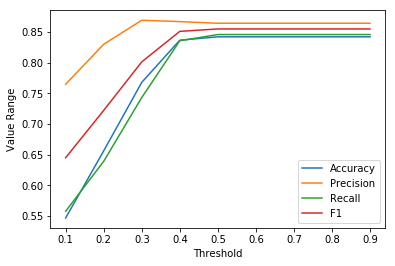

In [36]:
visualize_param(model,test_data_numpy,test_output,"positive")

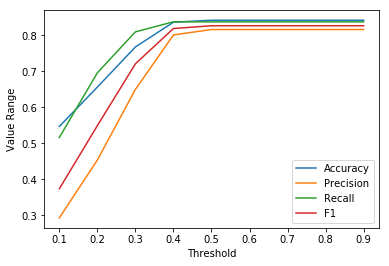

In [37]:
visualize_param(model,test_data_numpy,test_output,"negative")

__Answer : __ we choose the metric precision and the negative class for the shelter to take descion. This is because the shelter can estimate the number of animals which will not be adopted and thus the capacity to put these animals.

# Part C

In [38]:
def k_fold_cross_validation(model,train_data,train_output,num_folds):
    
    fold_size = train_data.shape[0]/num_folds # compute the number of items in a fold
    accuracy_results = []
    for i in range(0,train_data.shape[0]-1,fold_size):
        end_index = i + fold_size
        # subset the data to as a set for validation 
        validation_set,validation_target = train_data[i:end_index,:],train_output[i:end_index] 
        # remove this validation subset to and keep the remaining data for training
        training_set,training_target  = np.vstack((train_data[0:i,:],train_data[end_index+1:,:])),\
                                        np.concatenate((train_output[0:i],train_output[end_index+1:]))
        model.fit(training_set,training_target) # fit model
        predictions = model.predict_proba(validation_set)
        confusion = calculate_confusion_matrix(predictions,validation_target)
        acc = calculate_accuracy(confusion)
        accuracy_results.append(acc)
    
    return np.mean(accuracy_results)
    

In [43]:
import time
def greedy_backward_selection(model,data,target,features_to_keep):
    
    '''
    The algorithm follows the following steps:
        1. remove a feature of the model
        2. run cross validation on the subset of the data
        3. rank the columns according to the accuracy on the subset
        4. remove the feature with the minimum accuracy 
    '''
    
    temp_data = data.copy()
    columns_kept = train_data_df.columns.values
    
    while temp_data.shape[1] > features_to_keep:
        
        feature_acc = dict({})
    
        for i in range(0,temp_data.shape[1]):
            removed_feature = np.concatenate((temp_data[:,0:i],temp_data[:,i+1:]),axis=1)
            performance = k_fold_cross_validation(model,removed_feature,target,5)
            feature_acc[i] = performance
    
        worse_feature = min(feature_acc, key = lambda x: feature_acc.get(x))
        columns_kept = np.concatenate((columns_kept[0:worse_feature],columns_kept[worse_feature+1:])) 
        temp_data = np.concatenate((temp_data[:,0:worse_feature],temp_data[:,worse_feature+1:]),axis=1)
        
    
    return (columns_kept,feature_acc)

In [44]:
k = [1,5,10,15,20,25,30]
performances = []
for removal in k:
    perf_per_k = greedy_backward_selection(LogisticRegression(),train_data_numpy,train_output,removal)
    performances.append(perf_per_k)

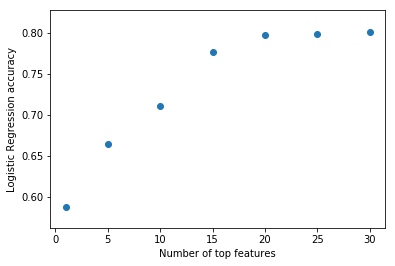

In [57]:
res = map(lambda x: x[1],performances)
res = map(lambda x : ( (max(x.keys())) , np.mean(x.values()) ) , res  )
x_data = map(lambda x : x[0],res)
y_data = map(lambda x : x[1],res)
plt.scatter(x_data,y_data)
plt.xlabel('Number of top features')
plt.ylabel('Logistic Regression accuracy')
plt.show()

__Answer : __ we select k = 30 as it gives us roughly the best performance with 80 % accuracy.

In [59]:
print("top 30 features are = {}".format(performances[len(performances) - 1][0]))

top 30 features are = ['intake_year' 'intake_number' 'age_upon_intake' 'animal_type_Bird'
 'animal_type_Cat' 'animal_type_Dog' 'animal_type_Other'
 'intake_condition_Aged' 'intake_condition_Feral'
 'intake_condition_Injured' 'intake_condition_Normal'
 'intake_condition_Nursing' 'intake_condition_Other'
 'intake_condition_Pregnant' 'intake_condition_Sick'
 'intake_type_Euthanasia Request' 'intake_type_Owner Surrender'
 'intake_type_Public Assist' 'intake_type_Stray' 'intake_type_Wildlife'
 'sex_upon_intake_Intact Female' 'sex_upon_intake_Intact Male'
 'sex_upon_intake_Neutered Male' 'sex_upon_intake_Spayed Female'
 'sex_upon_intake_Unknown' 'sex_upon_outcome_Intact Female'
 'sex_upon_outcome_Intact Male' 'sex_upon_outcome_Neutered Male'
 'sex_upon_outcome_Spayed Female' 'sex_upon_outcome_Unknown']


In [90]:
# the droped columns are columns are 3 and 4 we fit the model on the train data without these columns
temp = np.concatenate((train_data_numpy[:,0:3],train_data_numpy[:,5:]),axis=1) 
model.fit(temp,train_output)
# output the model coefficients to visualize the value of the features
zip(model.coef_.tolist()[0],(performances[len(performances) - 1][0]).tolist()) 

[(0.14297789836688407, 'intake_year'),
 (0.032836771919389614, 'intake_number'),
 (-0.30434537354894337, 'age_upon_intake'),
 (2.508030254027872, 'animal_type_Bird'),
 (-1.3542152394101663, 'animal_type_Cat'),
 (-1.5506255222303567, 'animal_type_Dog'),
 (-0.6047491760710546, 'animal_type_Other'),
 (0.414234740005272, 'intake_condition_Aged'),
 (-1.592508087844923, 'intake_condition_Feral'),
 (-0.17775625059614641, 'intake_condition_Injured'),
 (0.07801348083336626, 'intake_condition_Normal'),
 (0.2574572299600997, 'intake_condition_Nursing'),
 (-0.06290252833870812, 'intake_condition_Other'),
 (0.3591841415057948, 'intake_condition_Pregnant'),
 (-0.277282409208463, 'intake_condition_Sick'),
 (-0.48318592650762626, 'intake_type_Euthanasia Request'),
 (1.601219646797664, 'intake_type_Owner Surrender'),
 (-0.840994980584281, 'intake_type_Public Assist'),
 (0.7288996627396527, 'intake_type_Stray'),
 (-2.0074980861291416, 'intake_type_Wildlife'),
 (0.9990842665662434, 'sex_upon_intake_Intac

__Answer : __ to interpret the columns of the data ,we visualize their coefficient after fitting the model. Positive values imply that the output and the column are positively correlated and for negative is the opposite. <br>
Regarding the impact of the descion of the classifier , this depends on the coefficient of the column the larger the value the more the column affects the descion of the classifier

# Part D

In [91]:
num_trees = range(1,10)
tree_depth = range(1,10)
results = {}
# grid search over all possible combinations of number of trees parameter and tree depth parameter
for num in num_trees:
    for depth in tree_depth:
        model = RandomForestClassifier(max_depth=depth,n_estimators=num)
        acc = k_fold_cross_validation(model,train_data_numpy,train_output,5) # run cross validation on random forest
        results[(num,depth)] = acc

In [92]:
# find min of values
max_acc,best_hyper = None,None
for hyper_param in results.keys():
    if (max_acc== None) or (results[hyper_param]>max_acc):
        max_acc = results[hyper_param]
        best_hyper = hyper_param

In [94]:
max_acc,best_hyper

(0.8430477087256747, (9, 9))

In [96]:
best_random_forest = RandomForestClassifier(n_estimators=best_hyper[0],max_depth=best_hyper[1])
best_random_forest.fit(train_data_numpy,train_output)
preds = best_random_forest.predict(test_data_numpy)
random_forest_confusion = calculate_confusion_matrix(preds,test_output)
accuracy_forest = calculate_accuracy(random_forest_confusion)
precision_forest = calculate_precision(random_forest_confusion,"positive")
recall_forest = calculate_recall(random_forest_confusion,"positive")
f1_forest = calculate_f1_score(random_forest_confusion,"positive")

In [97]:
print("Results of Random forest : accuracy = {} , precision = {} , recall = {} and F1 = {}".format(\
    accuracy_forest,precision_forest,recall_forest,f1_forest))

Results of Random forest : accuracy = 0.538422934571 , precision = 1.0 , recall = 0.538422934571 and F1 = 0.699967378894


__Answer__ : <br>
Logistic regression outperforms random forest. We contribute this to the fact that the single trees are week in prediction and thus their aggregating their performance results is bad. 